In [ ]:
import pandas as pd
from google.colab import files

def calculate_averages(file_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Separate the data into test and train sets based on the 'evaluation_mode' column
    train_df = df[df['evaluation_mode'] == 'train']
    test_df = df[df['evaluation_mode'] == 'test']

    # Calculate the averages for precision, recall, and f1_score for the train set
    train_precision_avg = train_df['precision'].mean()
    train_recall_avg = train_df['recall'].mean()
    train_f1_avg = train_df['f1_score'].mean()

    # Calculate the averages for precision, recall, and f1_score for the test set
    test_precision_avg = test_df['precision'].mean()
    test_recall_avg = test_df['recall'].mean()
    test_f1_avg = test_df['f1_score'].mean()

    # Prepare the result for this file
    return {
        "Train Precision Average": train_precision_avg,
        "Train Recall Average": train_recall_avg,
        "Train F1 Score Average": train_f1_avg,
        "Test Precision Average": test_precision_avg,
        "Test Recall Average": test_recall_avg,
        "Test F1 Score Average": test_f1_avg
    }

# Upload multiple CSV files
uploaded_files = files.upload()

# Dictionary to store results for all files
results = {}

# Process each file and calculate the averages
for file_name in uploaded_files.keys():
    print(f"Processing file: {file_name}")
    result = calculate_averages(file_name)
    results[file_name] = result

# Display the results for each file
for file_name, averages in results.items():
    print(f"\nResults for {file_name}:")
    print(averages)


Saving view5_RGCN_LP_new.csv to view5_RGCN_LP_new.csv
Saving view5_GCN_LP_new.csv to view5_GCN_LP_new.csv
Saving view5_dismult_LP_new.csv to view5_dismult_LP_new.csv
Saving view4_GCN_LP_new.csv to view4_GCN_LP_new.csv
Saving view1_dismult_LP_new.csv to view1_dismult_LP_new.csv
Saving view5_complex_LP_new.csv to view5_complex_LP_new.csv
Saving view4_RGCN_LP_new.csv to view4_RGCN_LP_new.csv
Saving view4_dismult_LP_new.csv to view4_dismult_LP_new.csv
Saving view4_complex_LP_new.csv to view4_complex_LP_new.csv
Saving view1_RGCN_LP_new.csv to view1_RGCN_LP_new.csv
Saving view1_GCN_LP_new.csv to view1_GCN_LP_new.csv
Saving view1_complex_LP_new.csv to view1_complex_LP_new.csv
Processing file: view5_RGCN_LP_new.csv
Processing file: view5_GCN_LP_new.csv
Processing file: view5_dismult_LP_new.csv
Processing file: view4_GCN_LP_new.csv
Processing file: view1_dismult_LP_new.csv
Processing file: view5_complex_LP_new.csv
Processing file: view4_RGCN_LP_new.csv
Processing file: view4_dismult_LP_new.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

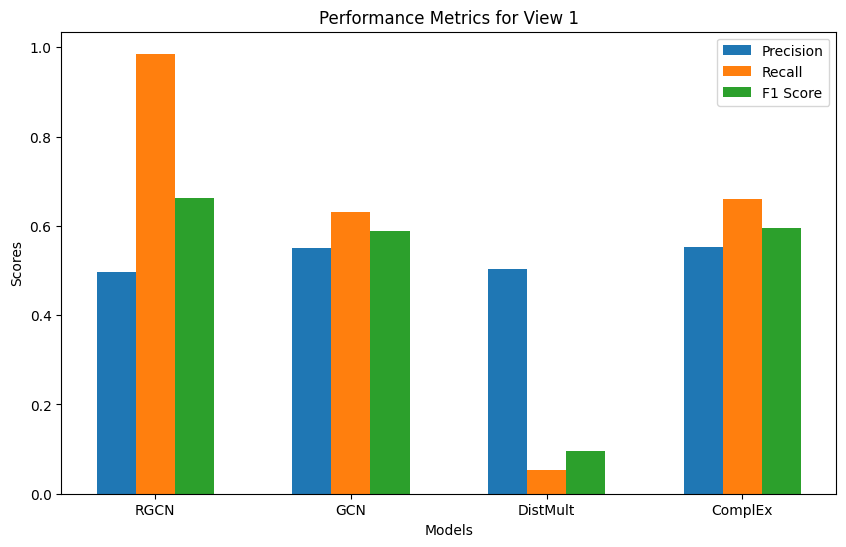

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example data for View 1 Train
data = {
    'Model': ['RGCN', 'GCN', 'DistMult', 'ComplEx'],
    'Precision': [0.4977, 0.5505, 0.5038, 0.553],
    'Recall': [0.9858, 0.6323, 0.0528, 0.661],
    'F1 Score': [0.6615, 0.5886, 0.0953, 0.5964]
}

df = pd.DataFrame(data)

# Plot bar chart
x = np.arange(len(df['Model']))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, df['Precision'], width, label='Precision')
bars2 = ax.bar(x, df['Recall'], width, label='Recall')
bars3 = ax.bar(x + width, df['F1 Score'], width, label='F1 Score')

# Add labels, title, and custom ticks
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for View 1')
ax.set_xticks(x)
ax.set_xticklabels(df['Model'])
ax.legend()

# Display
plt.show()


In [ ]:
# Example data across views
data = {
    'View': ['View 1', 'View 1', 'View 1', 'View 4', 'View 4', 'View 4', 'View 5', 'View 5', 'View 5'],
    'Model': ['TransE', 'RotatE', 'RDF2Vec', 'TransE', 'RotatE', 'RDF2Vec', 'TransE', 'RotatE', 'RDF2Vec'],
    'F1 Score': [0.6615, 0.5886, 0.0953, 0.6575, 0.5908, 0.0125, 0.6573, 0.3207, 0.2311]
}

df = pd.DataFrame(data)

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='View', y='F1 Score', hue='Model', marker='o')
plt.title('F1 Score Comparison Across Views')
plt.show()


NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the paths for your files
file_paths = {
    'view1_GCN': '/content/view1_GCN_LP_new.csv',
    'view1_RGCN': '/content/view1_RGCN_LP_new.csv',
    'view1_Distmult': '/content/view1_dismult_LP_new.csv',
    'view1_complex': '/content/view1_complex_LP_new.csv',
}

# Initialize an empty DataFrame to store all holdout F1 scores
holdout_data = []

# Read each CSV file into a DataFrame and extract F1 scores
for key, path in file_paths.items():
    df = pd.read_csv(path)

    # Separate F1 scores for train and test based on evaluation_mode
    for index, row in df.iterrows():
        holdout_data.append({
            'Model': key,
            'Holdout': index // 2 + 1,  # Assuming each holdout has both train and test rows
            'Evaluation_Mode': row['evaluation_mode'],
            'F1_Score': row['f1_score']
        })

# Create a new DataFrame for plotting
holdout_df = pd.DataFrame(holdout_data)

# Display the holdout DataFrame
print(holdout_df)


             Model  Holdout Evaluation_Mode  F1_Score
0        view1_GCN        1           train  0.441722
1        view1_GCN        1            test  0.417166
2        view1_GCN        2           train  0.339498
3        view1_GCN        2            test  0.304820
4        view1_GCN        3           train  0.295752
5        view1_GCN        3            test  0.254814
6        view1_GCN        4           train  0.329309
7        view1_GCN        4            test  0.291049
8        view1_GCN        5           train  0.467101
9        view1_GCN        5            test  0.446768
10      view1_RGCN        1           train  0.503025
11      view1_RGCN        1            test  0.487758
12      view1_RGCN        2           train  0.626882
13      view1_RGCN        2            test  0.624339
14      view1_RGCN        3           train  0.586020
15      view1_RGCN        3            test  0.579745
16      view1_RGCN        4           train  0.593418
17      view1_RGCN        4 

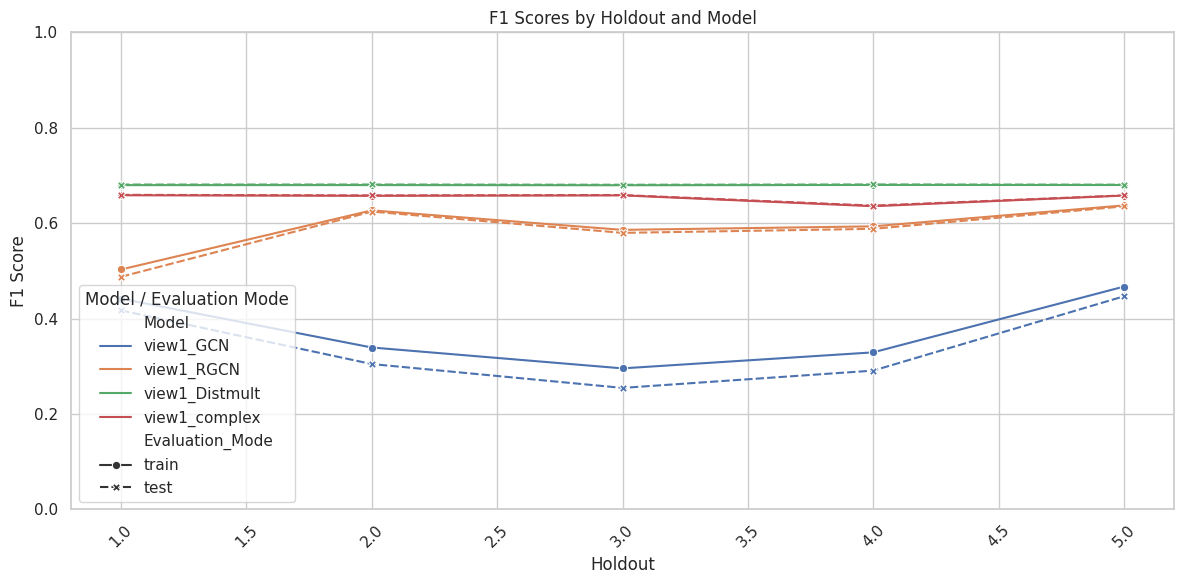

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure for F1 scores
plt.figure(figsize=(12, 6))
sns.lineplot(data=holdout_df, x='Holdout', y='F1_Score', hue='Model', style='Evaluation_Mode', markers=True)
plt.title('F1 Scores by Holdout and Model')
plt.xlabel('Holdout')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Assuming F1 scores are between 0 and 1
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Model / Evaluation Mode')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the paths for your files
file_paths = {
    'view4_GCN': '/content/view4_GCN_LP_new.csv',
    'view4_RGCN': '/content/view4_RGCN_LP_new.csv',
    'view4_Distmult': '/content/view4_dismult_LP_new.csv',
    'view4_complex': '/content/view4_complex_LP_new.csv',
}

# Initialize an empty DataFrame to store all holdout F1 scores
holdout_data = []

# Read each CSV file into a DataFrame and extract F1 scores
for key, path in file_paths.items():
    df = pd.read_csv(path)

    # Separate F1 scores for train and test based on evaluation_mode
    for index, row in df.iterrows():
        holdout_data.append({
            'Model': key,
            'Holdout': index // 2 + 1,  # Assuming each holdout has both train and test rows
            'Evaluation_Mode': row['evaluation_mode'],
            'F1_Score': row['f1_score']
        })

# Create a new DataFrame for plotting
holdout_df = pd.DataFrame(holdout_data)

# Display the holdout DataFrame
print(holdout_df)


            Model  Holdout Evaluation_Mode  F1_Score
0       view4_GCN        1           train  0.658282
1       view4_GCN        1            test  0.660226
2       view4_GCN        2           train  0.658508
3       view4_GCN        2            test  0.659934
4       view4_GCN        3           train  0.658486
..            ...      ...             ...       ...
65  view4_complex       18            test  0.649136
66  view4_complex       19           train  0.648627
67  view4_complex       19            test  0.649505
68  view4_complex       20           train  0.649973
69  view4_complex       20            test  0.650489

[70 rows x 4 columns]


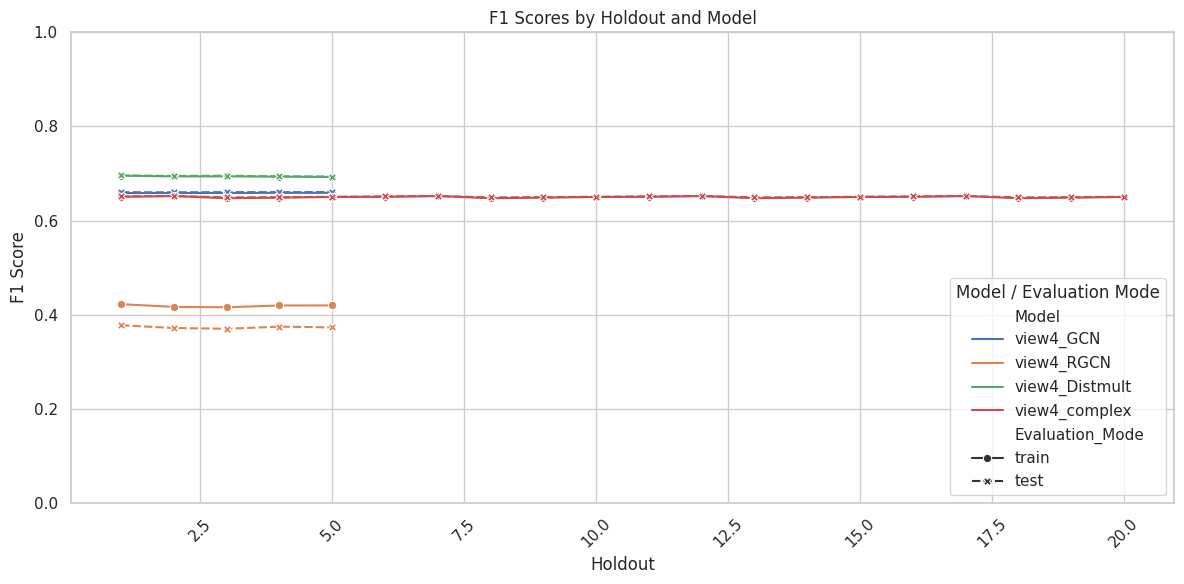

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure for F1 scores
plt.figure(figsize=(12, 6))
sns.lineplot(data=holdout_df, x='Holdout', y='F1_Score', hue='Model', style='Evaluation_Mode', markers=True)
plt.title('F1 Scores by Holdout and Model')
plt.xlabel('Holdout')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Assuming F1 scores are between 0 and 1
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Model / Evaluation Mode')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the paths for your files
file_paths = {
    'view5_GCN': '/content/view5_GCN_LP_new.csv',
    'view5_RGCN': '/content/view5_RGCN_LP_new.csv',
    'view5_Distmult': '/content/view5_dismult_LP_new.csv',
    'view5_complex': '/content/view5_complex_LP_new.csv',
}

# Initialize an empty DataFrame to store all holdout F1 scores
holdout_data = []

# Read each CSV file into a DataFrame and extract F1 scores
for key, path in file_paths.items():
    df = pd.read_csv(path)

    # Separate F1 scores for train and test based on evaluation_mode
    for index, row in df.iterrows():
        holdout_data.append({
            'Model': key,
            'Holdout': index // 2 + 1,  # Assuming each holdout has both train and test rows
            'Evaluation_Mode': row['evaluation_mode'],
            'F1_Score': row['f1_score']
        })

# Create a new DataFrame for plotting
holdout_df = pd.DataFrame(holdout_data)

# Display the holdout DataFrame
print(holdout_df)


             Model  Holdout Evaluation_Mode  F1_Score
0        view5_GCN        1           train  0.246171
1        view5_GCN        1            test  0.167913
2        view5_GCN        2           train  0.254396
3        view5_GCN        2            test  0.173985
4        view5_GCN        3           train  0.246622
5        view5_GCN        3            test  0.166528
6        view5_GCN        4           train  0.248367
7        view5_GCN        4            test  0.167253
8        view5_GCN        5           train  0.252966
9        view5_GCN        5            test  0.171641
10      view5_RGCN        1           train  0.649218
11      view5_RGCN        1            test  0.648238
12      view5_RGCN        2           train  0.647880
13      view5_RGCN        2            test  0.646905
14      view5_RGCN        3           train  0.647428
15      view5_RGCN        3            test  0.645423
16      view5_RGCN        4           train  0.647522
17      view5_RGCN        4 

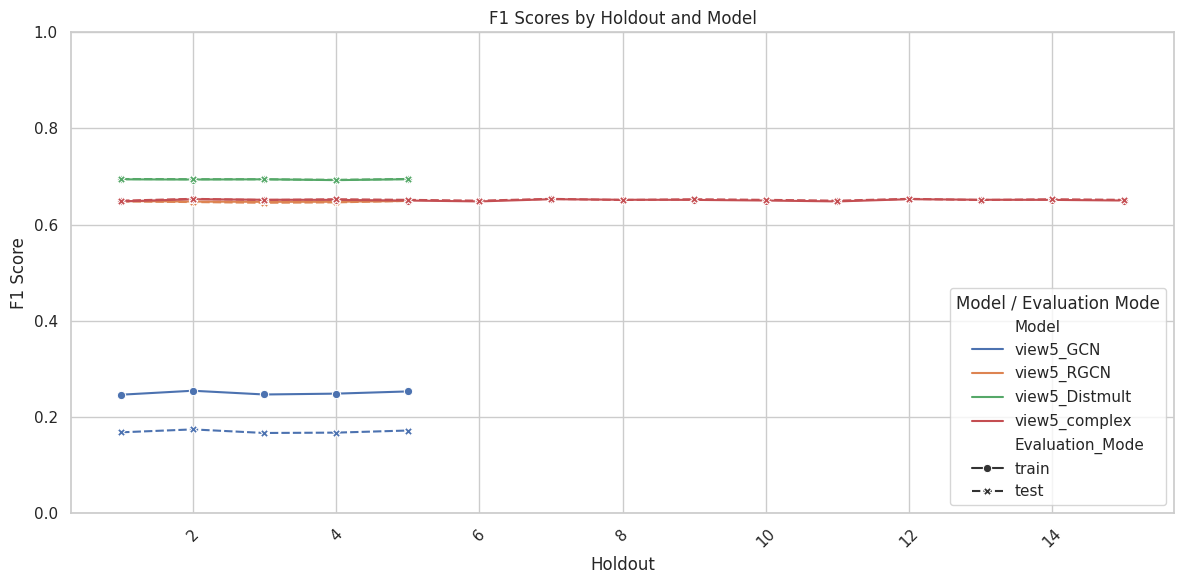

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure for F1 scores
plt.figure(figsize=(12, 6))
sns.lineplot(data=holdout_df, x='Holdout', y='F1_Score', hue='Model', style='Evaluation_Mode', markers=True)
plt.title('F1 Scores by Holdout and Model')
plt.xlabel('Holdout')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Assuming F1 scores are between 0 and 1
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Model / Evaluation Mode')
plt.tight_layout()
plt.show()


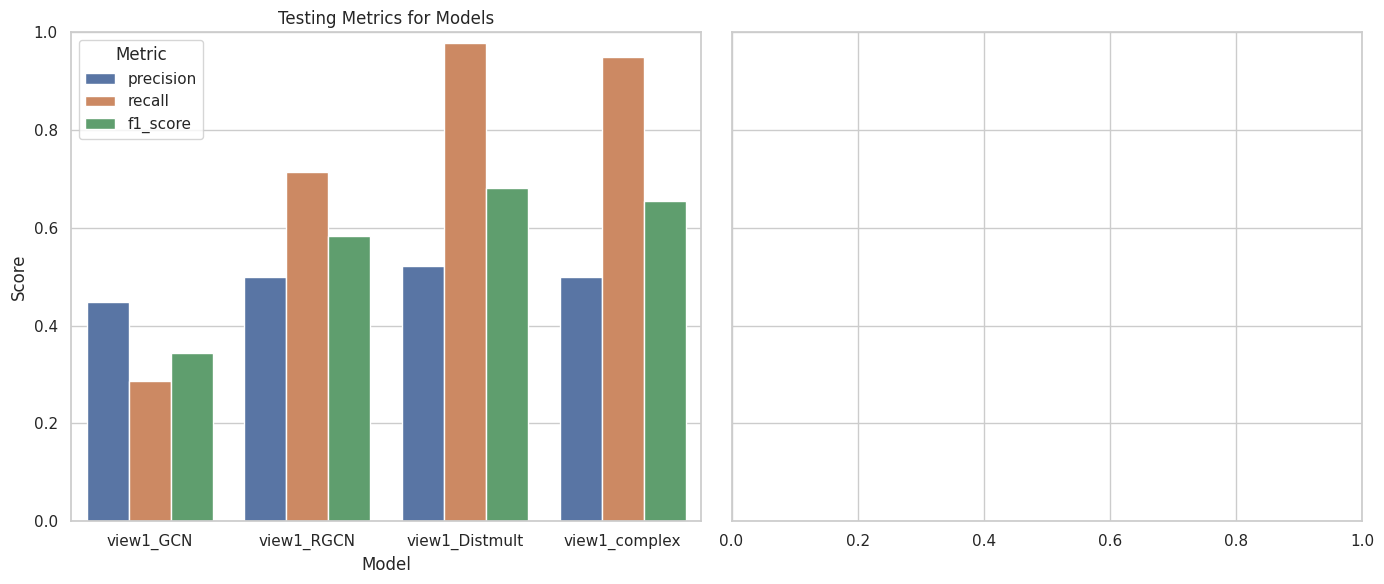

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
file_paths = {
    'view1_GCN': '/content/view1_GCN_LP_new.csv',
    'view1_RGCN': '/content/view1_RGCN_LP_new.csv',
    'view1_Distmult': '/content/view1_distmult_LP_new.csv',
    'view1_complex': '/content/view1_complex_LP_new.csv',
}

# Load data into a list of DataFrames
dataframes = []

for model, path in file_paths.items():
    # Load each CSV file
    df = pd.read_csv(path)

    # Add a new column for the model name
    df['Model'] = model

    # Append to the list
    dataframes.append(df)

# Concatenate all DataFrames into one
results_df = pd.concat(dataframes)



# Reshape the DataFrame for plotting
results_long = results_df.melt(id_vars=['Model', 'evaluation_mode'],
                                value_vars=['precision', 'recall', 'f1_score'],
                                var_name='Metric',
                                value_name='Score')

# Create a figure for the bar graphs
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Create a bar plot for training scores
#train_data = results_long[results_long['evaluation_mode'] == 'train']
#sns.barplot(data=train_data, x='Model', y='Score', hue='Metric', ax=axes[0], errorbar=None)
#axes[0].set_title('Training Metrics for Models')
#axes[0].set_ylim(0, 1)
#axes[0].set_xlabel('Model')
#axes[0].set_ylabel('Score')
#axes[0].legend(title='Metric')

# Create a bar plot for testing scores
test_data = results_long[results_long['evaluation_mode'] == 'test']
sns.barplot(data=test_data, x='Model', y='Score', hue='Metric', ax=axes[0], errorbar=None)
axes[0].set_title('Testing Metrics for Models')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Score')
axes[0].legend(title='Metric')

plt.tight_layout()
plt.show()


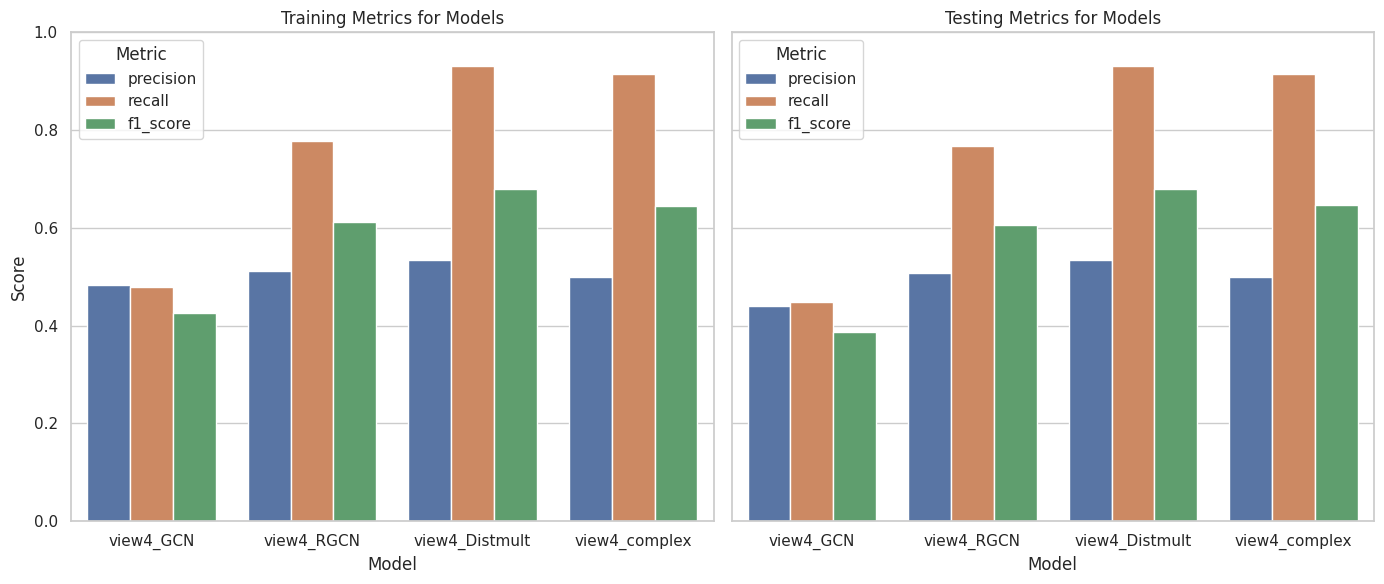

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
file_paths = {
    'view4_GCN': '/content/view4_GCN_LP_new.csv',
    'view4_RGCN': '/content/view4_RGCN_LP_new.csv',
    'view4_Distmult': '/content/view4_distmult_LP_new.csv',
    'view4_complex': '/content/view4_complex_LP_new.csv',
}

# Load data into a list of DataFrames
dataframes = []

for model, path in file_paths.items():
    # Load each CSV file
    df = pd.read_csv(path)

    # Add a new column for the model name
    df['Model'] = model

    # Append to the list
    dataframes.append(df)

# Concatenate all DataFrames into one
results_df = pd.concat(dataframes)



# Reshape the DataFrame for plotting
results_long = results_df.melt(id_vars=['Model', 'evaluation_mode'],
                                value_vars=['precision', 'recall', 'f1_score'],
                                var_name='Metric',
                                value_name='Score')

# Create a figure for the bar graphs
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Create a bar plot for training scores
train_data = results_long[results_long['evaluation_mode'] == 'train']
sns.barplot(data=train_data, x='Model', y='Score', hue='Metric', ax=axes[0], errorbar=None)
axes[0].set_title('Training Metrics for Models')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Score')
axes[0].legend(title='Metric')

# Create a bar plot for testing scores
test_data = results_long[results_long['evaluation_mode'] == 'test']
sns.barplot(data=test_data, x='Model', y='Score', hue='Metric', ax=axes[1], errorbar=None)
axes[1].set_title('Testing Metrics for Models')
axes[1].set_ylim(0, 1)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Score')
axes[1].legend(title='Metric')

plt.tight_layout()
plt.show()


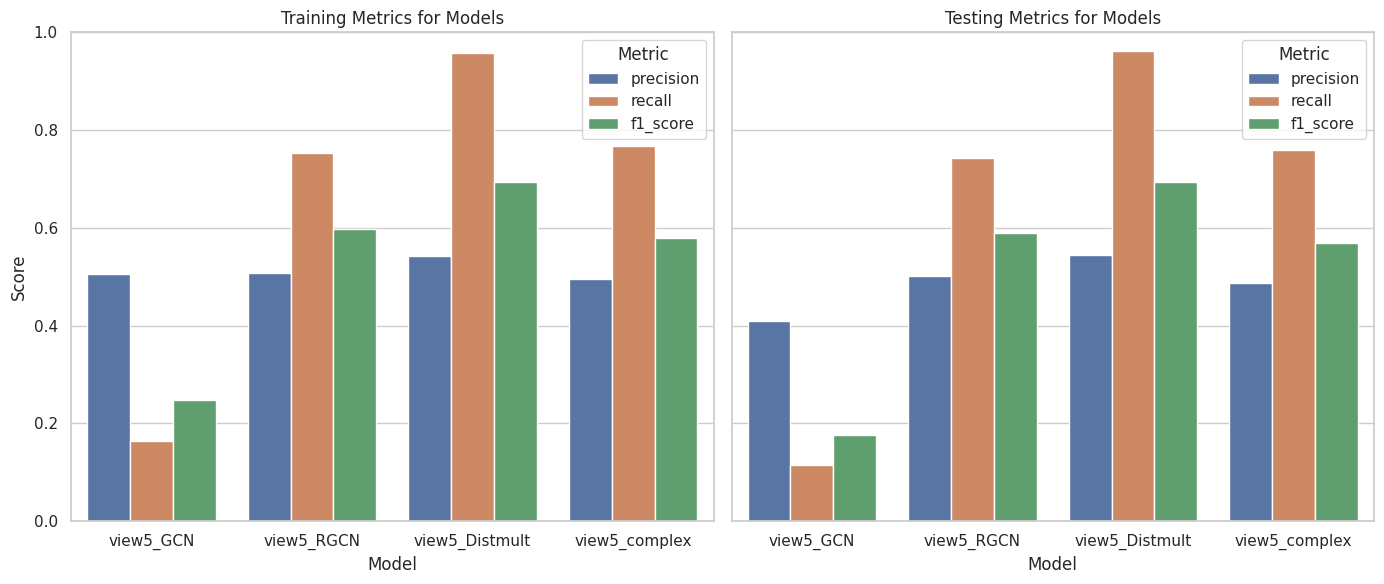

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
file_paths = {
    'view5_GCN': '/content/view5_GCN_LP_new.csv',
    'view5_RGCN': '/content/view5_RGCN_LP_new.csv',
    'view5_Distmult': '/content/view5_distmult_LP_new.csv',
    'view5_complex': '/content/view5_complex_LP_new.csv',
}

# Load data into a list of DataFrames
dataframes = []

for model, path in file_paths.items():
    # Load each CSV file
    df = pd.read_csv(path)

    # Add a new column for the model name
    df['Model'] = model

    # Append to the list
    dataframes.append(df)

# Concatenate all DataFrames into one
results_df = pd.concat(dataframes)



# Reshape the DataFrame for plotting
results_long = results_df.melt(id_vars=['Model', 'evaluation_mode'],
                                value_vars=['precision', 'recall', 'f1_score'],
                                var_name='Metric',
                                value_name='Score')

# Create a figure for the bar graphs
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Create a bar plot for training scores
train_data = results_long[results_long['evaluation_mode'] == 'train']
sns.barplot(data=train_data, x='Model', y='Score', hue='Metric', ax=axes[0], errorbar=None)
axes[0].set_title('Training Metrics for Models')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Score')
axes[0].legend(title='Metric')

# Create a bar plot for testing scores
test_data = results_long[results_long['evaluation_mode'] == 'test']
sns.barplot(data=test_data, x='Model', y='Score', hue='Metric', ax=axes[1], errorbar=None)
axes[1].set_title('Testing Metrics for Models')
axes[1].set_ylim(0, 1)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Score')
axes[1].legend(title='Metric')

plt.tight_layout()
plt.show()
